# Live Chat

In this we'll have a first look at live chat. We will just be considering the data on October as a starting point to get a handle on the data 

A start is to look at when a conversation is rated as good or not.  Some basic metrics could be Chat duration, average response time and Operator.  We can see if this is in any way linked to weather or not the chat was rated as good.

We will look at the following charts as part of our initial analysis
* The distribution of the length of conversation (using a histogram)
* the distribution of the good vs not rate conversations using length of conversation
* the distribution of the good vs not rate conversations using average response
* the distribution of the good vs not rate conversations using first response time
In the last three of these distributions we will look at whether or not the difference in the means is statistically significant using a hypothesis test

We will then do a break down by agent to see if the proportion of good vs not rated chats.  In this we will look at 
* A stacked bar chart by value 
* A stacked bar chart by percentage

I have also included the data set in the github page so you can rerun the numbers for yourself.






Future thoughts:
The next step will them be to match these records to the actual text of the conversation and try, probably all three methods of either Count Vectoriser, TfidfVectorizer and HashingVectorizer (or maybe use Facebooks fast text)and then run them through a machine learning algorithm to see what they produce.  I'm not sure which one's yet but we'll get there.



# Imports and creating the dataframe

Let's import some classes and then create our dataframe in pandas.

In [5]:
#this will keep all our graphs in the page
%matplotlib inline

# a few libraries that we will need

import numpy as np 
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

#set up pandas table display
pd.set_option ("display.width", 500)
pd.set_option ("display.max_columns", 100)
pd.set_option ("display.notebook_repr_html", True)
import seaborn as sns #gives us a bit more style in our plots

#We need this to look at excel files
import openpyxl

from pandas import DataFrame, read_excel, merge
import xlrd



file_name = r"C:\Users\Mrs Farrelly\Documents\James\LiveChat\chats_report_October18_appended.xlsx"
#table1 = chats_report_October18

df_chats = pd.read_excel(file_name, header = 0)
df_chats.head()




#lets create a dataframe using out chats_report_October18.xlsx
#df_chats = pd.read_excel (file_name, sheet_name = table1, header = 0)

,conferenceId,chat creation date Europe/London,chat start date Europe/London,chat duration in seconds,queue duration in seconds,rate,operator 1 nick,first response time,average response time
0,PFWWMRWSUQ,2018-10-01 08:12:00,2018-10-01 08:12:00,595,NaN,not rated,Ellie,35.0,37.0
1,PFXWSSVIXS,2018-10-01 08:31:00,2018-10-01 08:31:00,45,NaN,not rated,Ellie,NaN,NaN
2,PFYWKS8Y9W,2018-10-01 08:32:00,2018-10-01 08:32:00,182,NaN,not rated,Ellie,26.0,26.0
3,PFZWPTLQTY,2018-10-01 08:49:00,2018-10-01 08:49:00,103,NaN,not rated,Ellie,10.0,8.0
4,PF2W3VWLQ4,2018-10-01 09:29:00,2018-10-01 09:29:00,127,NaN,not rated,Ellie,7.0,11.0


In [6]:
print (df_chats.shape)

(1132, 9)


In [7]:

#first we're going to need a list of column names
list (df_chats.columns.values)


['conferenceId',
 'chat creation date Europe/London',
 'chat start date Europe/London',
 'chat duration in seconds',
 'queue duration in seconds',
 'rate',
 'operator 1 nick',
 'first response time',
 'average response time']

### Cleaning up the dataframe 

In [8]:
#gapminder_ocean.drop(['pop'], axis=1)
#Okay lets get rid of a few of the columns we wont need
df_cleanchats = df_chats.drop (['chat creation date Europe/London'
 ], axis = 1)                              

In [9]:
#Okay lets have a look

df_cleanchats.head(10)

,conferenceId,chat start date Europe/London,chat duration in seconds,queue duration in seconds,rate,operator 1 nick,first response time,average response time
0,PFWWMRWSUQ,2018-10-01 08:12:00,595,NaN,not rated,Ellie,35.0,37.0
1,PFXWSSVIXS,2018-10-01 08:31:00,45,NaN,not rated,Ellie,NaN,NaN
2,PFYWKS8Y9W,2018-10-01 08:32:00,182,NaN,not rated,Ellie,26.0,26.0
3,PFZWPTLQTY,2018-10-01 08:49:00,103,NaN,not rated,Ellie,10.0,8.0
4,PF2W3VWLQ4,2018-10-01 09:29:00,127,NaN,not rated,Ellie,7.0,11.0
5,PF2WWWZ68I,2018-10-01 09:42:00,176,NaN,not rated,Ellie,31.0,15.0
6,PF1WGV52RM,2018-10-01 09:43:00,152,NaN,not rated,Ellie,45.0,35.0
7,PF3WWWVVJS,2018-10-01 09:57:00,566,NaN,not rated,Ellie,23.0,17.0
8,PF3WNW3O1G,2018-10-01 09:58:00,1224,NaN,rated good,Ellie,23.0,17.0
9,PF5WVYY2FK,2018-10-01 10:30:00,630,NaN,rated good,Ellie,16.0,20.0


In [10]:
print (df_cleanchats.shape)

(1132, 8)


## Analysis

### Length of conversation

Okay, lets have a look at the shape of the chat duration

In [11]:
df_cleanchats.describe()

,chat duration in seconds,queue duration in seconds,first response time,average response time
count,1132.000000,255.000000,1032.000000,1032.000000
mean,513.778269,154.156863,26.203488,26.840116
std,437.419601,193.553262,31.195346,22.549022
min,1.000000,1.000000,0.000000,1.000000
25%,228.000000,16.000000,11.000000,14.000000
50%,393.500000,86.000000,17.000000,21.000000
75%,663.000000,201.000000,31.000000,33.000000
max,4503.000000,1334.000000,515.000000,286.000000


C:\Users\Mrs Farrelly\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


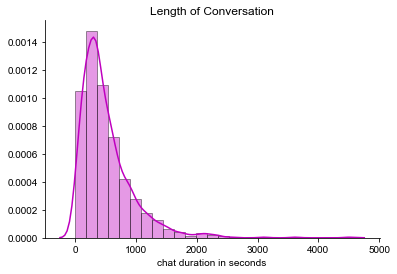

In [12]:
x = df_cleanchats ["chat duration in seconds"]
ax = sns.distplot (x , hist =True, kde = True, rug = False, color = "m", bins = 25, hist_kws = {"edgecolor" : "black"})
plt.title("Length of Conversation")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.despine()
plt.show()

Now lets have a look at if there is a difference in conversation time for good and not rated conversation

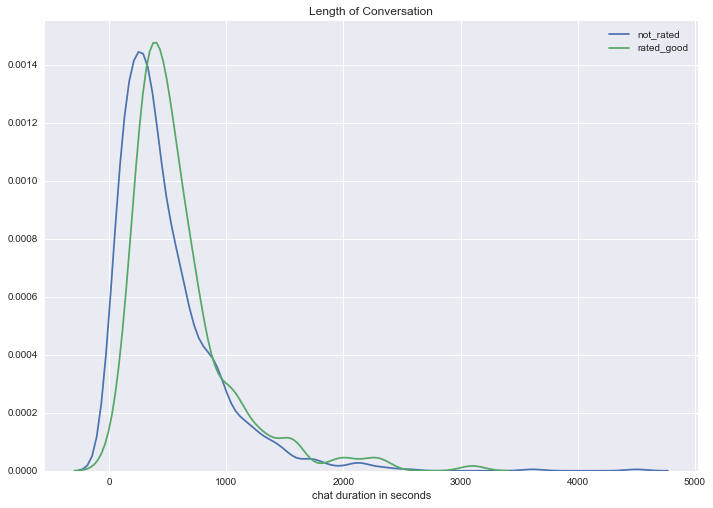

In [13]:
not_rated = df_cleanchats.loc[df_cleanchats['rate']=='not rated']['chat duration in seconds']
rated_good = df_cleanchats.loc[df_cleanchats['rate']=='rated good']['chat duration in seconds']

sns.distplot(not_rated, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='not_rated')
sns.distplot(rated_good, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='rated_good')
#this gets rid of the outer axis lines
sns.despine()
#This sets the size of the figure in inches
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set_context("paper")
plt.title("Length of Conversation")
plt.legend()

There seems to be a slight difference. Lets go ahead and see if the sample mean distributions are different.

So basically what we are doing here is setting up a null hypothesis that there is no diffence in the sample means and then testing it at the 5% level of significance to see if there is a difference.


In [14]:


#lets find out how many we've got of not rated and rated good we have
df_cleanchats['rate'].value_counts()


not rated     904
rated good    227
rated bad       1
Name: rate, dtype: int64

In [15]:
#We're going to need a few more imports to start with
from scipy import stats
from math import sqrt
from scipy.stats import t

# Import data
#data = pandas.read_csv('data.csv')

#sets out what we call the two samples
sample1 =df_cleanchats.loc[df_cleanchats['rate']=='not rated']['chat duration in seconds']
sample2 = df_cleanchats.loc[df_cleanchats['rate']=='rated good']['chat duration in seconds']

# Run independent t-test
#ind_t_test = stats.ttest_ind(data.value[data.names == 'beef'],data.value[data.names == 'pork'])
ind_t_test = stats.ttest_ind(sample1, sample2)

# Calculate the mean difference and 95% confidence interval
N1 = 904
N2 = 227
df = (N1 + N2 - 2)
std1 = sample1.std()
std2 = sample2.std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

diff_mean = sample1.mean() - sample2.mean()
#this bit calculates our margin of error
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The results of the independent t-test are: 
	t-value = -3.749
	p-value = 0.000

The difference between groups is -121.0 [-184.3 to -57.7] (mean [95% CI])


So what do these values mean. Well, the statistic = -3.96 is compared to the significant level t-vlaue of a t-distribution with degrees of freedom = number of values of the smaller sample minus 1. If you don't understand that it's okay. Check out khan academy for difference of sample means.

The p-value is really what we care about here.  the value of 0.0003 is smaller than 0.05.  That means we can reject the null hypothesis.  Basically we are 95% sure the two sample means are different.  The actual significant level of the test is 0.03%.  This means we are 99.97% sure the sample means are different.

## Average Waiting time

Now lets have a look at the average waiting time for good and not rated.

Fist we'll need to drop the NaN points and then we can see how many we loose

## Tip

If you copying from above don't forget to change the name of your dataframe.

(1032, 8)
conferenceId                     False
chat start date Europe/London    False
chat duration in seconds         False
queue duration in seconds         True
rate                             False
operator 1 nick                  False
first response time              False
average response time            False
dtype: bool
None


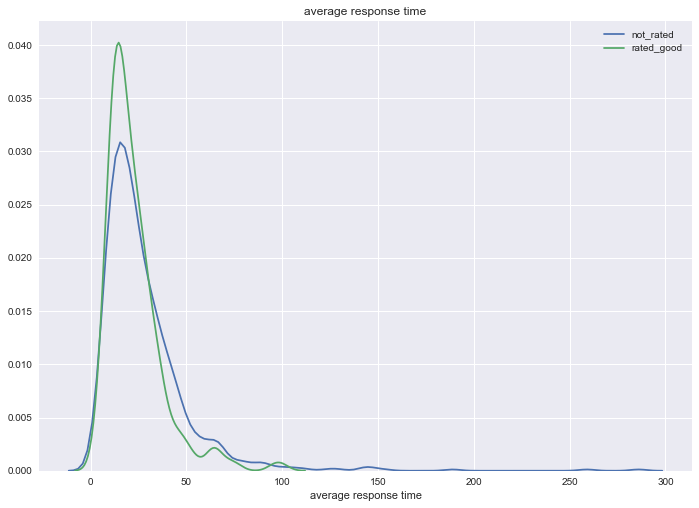

In [16]:
#this drops the NaN rows from df_cleanchats and calls it df_cleanchats_ART for Average Response Time.
df_cleanchats_ART = df_cleanchats.dropna(subset = ['average response time'])
#this prints the shape of the df_cleanchats_ART last time it was (1132, 47)
print (df_cleanchats_ART.shape)
#this checks for any NaN values
print(print (df_cleanchats_ART.isnull().any()))

#this sets up the variables for the overlapping histogram.
not_rated = df_cleanchats_ART.loc[df_cleanchats_ART['rate']=='not rated']['average response time']
rated_good = df_cleanchats_ART.loc[df_cleanchats_ART['rate']=='rated good']['average response time']

#this plots the histograms overlaping using seaborn
sns.distplot(not_rated, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='not_rated')
sns.distplot(rated_good, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='rated_good')
#this gets rid of the outer axis lines
sns.despine()
#This sets the size of the figure in inches
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set_context("paper")
plt.title("average response time")
plt.legend()

In [17]:
print (df_cleanchats_ART.dtypes)

conferenceId                             object
chat start date Europe/London    datetime64[ns]
chat duration in seconds                  int64
queue duration in seconds               float64
rate                                     object
operator 1 nick                          object
first response time                     float64
average response time                   float64
dtype: object


Okay, so while there seem to be more not_rated conversations than rated_good conversations, there doesn't appear to be a difference in the mean. We can conduct the same hypothesis test as above to see if we can confirm our results. Also, we have lost 100 rows (observations) by dropping the Nan Values (values that don't exist but are messing with our analysis)



In [18]:
#lets find out how many we've got of not rated and rated good we have
df_cleanchats_ART['rate'].value_counts()

not rated     806
rated good    225
rated bad       1
Name: rate, dtype: int64

In [19]:
#We're going to need a few more imports to start with
from scipy import stats
from math import sqrt
from scipy.stats import t

# Import data
#data = pandas.read_csv('data.csv')

#sets out what we call the two samples
sample1 =df_cleanchats_ART.loc[df_cleanchats_ART['rate']=='not rated']['average response time']
sample2 = df_cleanchats_ART.loc[df_cleanchats_ART['rate']=='rated good']['average response time']

# Run independent t-test
#ind_t_test = stats.ttest_ind(data.value[data.names == 'beef'],data.value[data.names == 'pork'])
ind_t_test = stats.ttest_ind(sample1, sample2)

# Calculate the mean difference and 95% confidence interval
N1 = 806
N2 = 225
df = (N1 + N2 - 2)
std1 = sample1.std()
std2 = sample2.std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

diff_mean = sample1.mean() - sample2.mean()
#this bit calculates our margin of error
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The results of the independent t-test are: 
	t-value = 3.109
	p-value = 0.002

The difference between groups is 5.3 [1.9 to 8.6] (mean [95% CI])


okay so there is a slight difference in the mean of the groups but only by 5.3 seconds, where as in the previous example it was more like 2 minutes.

## First repsonse time

I suppost the last thing to do is check first response time with the same calculations and see what's going on.

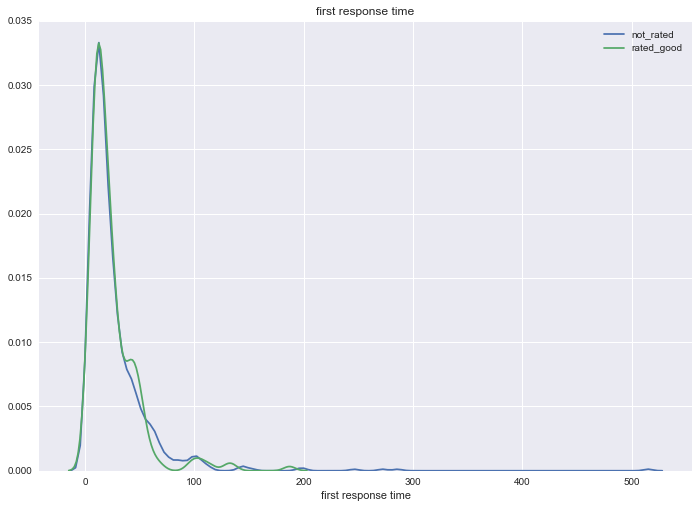

In [20]:
#we don't need to redefine the dataframe just the column header
#this sets up the variables for the overlapping histogram.
not_rated = df_cleanchats_ART.loc[df_cleanchats_ART['rate']=='not rated']['first response time']
rated_good = df_cleanchats_ART.loc[df_cleanchats_ART['rate']=='rated good']['first response time']

#this plots the histograms overlaping using seaborn
sns.distplot(not_rated, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='not_rated')
sns.distplot(rated_good, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='rated_good')
#this gets rid of the outer axis lines
sns.despine()
#This sets the size of the figure in inches
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set_context("paper")
plt.title("first response time")
plt.legend()

In [21]:
#We're going to need a few more imports to start with
from scipy import stats
from math import sqrt
from scipy.stats import t

# Import data
#data = pandas.read_csv('data.csv')

#sets out what we call the two samples
sample1 =df_cleanchats_ART.loc[df_cleanchats_ART['rate']=='not rated']['first response time']
sample2 = df_cleanchats_ART.loc[df_cleanchats_ART['rate']=='rated good']['first response time']

# Run independent t-test
#ind_t_test = stats.ttest_ind(data.value[data.names == 'beef'],data.value[data.names == 'pork'])
ind_t_test = stats.ttest_ind(sample1, sample2)

# Calculate the mean difference and 95% confidence interval
N1 = 806
N2 = 225
df = (N1 + N2 - 2)
std1 = sample1.std()
std2 = sample2.std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

diff_mean = sample1.mean() - sample2.mean()
#this bit calculates our margin of error
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The results of the independent t-test are: 
	t-value = 0.825
	p-value = 0.410

The difference between groups is 1.9 [-2.7 to 6.6] (mean [95% CI])


so basically there is no difference between first response time for those rated good and those not rated.

## By Agent

Okay, so the last part of initial analysis is to have a look if there is any difference by agent.  That is does the person answering the live chat make a difference to the number of responses rated good.  We can look at the proportion per Agent to begin with.  We also may want to discount all those who don't answer live chat very often.

It is worth noting that this does not take into account customers who think the conversation is good then just decide to not rate the experience.  We will cover this using Natural Lanuage Processing in the next Notebook.

One thing to try is to generate a list from this and then try a list comprehension to create a new data frame.  Can't think of any other way to generate this.  Then I can use the new data frame to create a stacked bar chart.

In [22]:
df_cleanchats_ART.groupby('operator 1 nick')['rate'].value_counts()

operator 1 nick     rate      
Alice               not rated       2
                    rated good      1
Becca               not rated     103
                    rated good     32
                    rated bad       1
Becki               not rated      84
                    rated good     27
Belle               not rated      14
                    rated good      4
Charlene            not rated       3
Cherelle Toussaint  not rated       4
Elle                not rated       9
Ellie               not rated      51
                    rated good     11
Emily               not rated      90
                    rated good     20
Kestina Hunter      not rated      17
                    rated good      3
Kim                 not rated      28
                    rated good      5
Kristina            not rated       9
                    rated good      1
Lewis               not rated      45
                    rated good     30
Michele             not rated     111
                   

In [23]:
df_cleanchats_ART.groupby('operator 1 nick')['rate'].value_counts().to_dict()

{('Alice', 'not rated'): 2,
 ('Alice', 'rated good'): 1,
 ('Becca', 'not rated'): 103,
 ('Becca', 'rated good'): 32,
 ('Becca', 'rated bad'): 1,
 ('Becki', 'not rated'): 84,
 ('Becki', 'rated good'): 27,
 ('Belle', 'not rated'): 14,
 ('Belle', 'rated good'): 4,
 ('Charlene ', 'not rated'): 3,
 ('Cherelle Toussaint', 'not rated'): 4,
 ('Elle', 'not rated'): 9,
 ('Ellie', 'not rated'): 51,
 ('Ellie', 'rated good'): 11,
 ('Emily', 'not rated'): 90,
 ('Emily', 'rated good'): 20,
 ('Kestina Hunter', 'not rated'): 17,
 ('Kestina Hunter', 'rated good'): 3,
 ('Kim', 'not rated'): 28,
 ('Kim', 'rated good'): 5,
 ('Kristina ', 'not rated'): 9,
 ('Kristina ', 'rated good'): 1,
 ('Lewis', 'not rated'): 45,
 ('Lewis', 'rated good'): 30,
 ('Michele', 'not rated'): 111,
 ('Michele', 'rated good'): 5,
 ('Oliver Hubbard', 'not rated'): 10,
 ('Oliver Hubbard', 'rated good'): 2,
 ('Rob', 'not rated'): 82,
 ('Rob', 'rated good'): 46,
 ('Roisin Delaney', 'not rated'): 76,
 ('Roisin Delaney', 'rated good'):

create a list of all the agents

In [24]:
#probably don't need this import
from collections import OrderedDict
#this gives a dictionary of all the agents and every time they appear
agents = df_cleanchats_ART['operator 1 nick'].to_dict()
#this is an empty dictionary which I am going to use to collect the values of 
#everytime an agent appears, basically add them all up
agents2 ={}

for v in agents.values():
    if not v in agents2: agents2[v]=1
    else: agents2[v]+=1
           
agents2  


{'Ellie': 62,
 'Michele': 116,
 'Emily': 110,
 'Becki': 111,
 'Kim': 33,
 'Rosie': 91,
 'Becca': 136,
 'Oliver Hubbard': 12,
 'Kristina ': 10,
 'Roisin Delaney': 91,
 'Lewis': 75,
 'Cherelle Toussaint': 4,
 'Kestina Hunter': 20,
 'Rob': 128,
 'Alice': 3,
 'Elle': 9,
 'Charlene ': 3,
 'Belle': 18}

create a list of agents who appear more than 50 times

In [25]:
#I start by creating agents3 so I don't change agents 2
#this will help if I want to increase the size of my dataset
agents_total = agents2
agents_total = dict((k, v) for k, v in agents2.items() if v >= 50)
agents_total


{'Ellie': 62,
 'Michele': 116,
 'Emily': 110,
 'Becki': 111,
 'Rosie': 91,
 'Becca': 136,
 'Roisin Delaney': 91,
 'Lewis': 75,
 'Rob': 128}

Now lets do the same thing but for only not rated. We won't have to limit this to greater than 50. 
agents_nr is agents not rated

In [26]:
agents_nr= df_cleanchats_ART.groupby('rate')['operator 1 nick'].value_counts().to_dict()
agents_nr


{('not rated', 'Michele'): 111,
 ('not rated', 'Becca'): 103,
 ('not rated', 'Emily'): 90,
 ('not rated', 'Becki'): 84,
 ('not rated', 'Rob'): 82,
 ('not rated', 'Roisin Delaney'): 76,
 ('not rated', 'Rosie'): 68,
 ('not rated', 'Ellie'): 51,
 ('not rated', 'Lewis'): 45,
 ('not rated', 'Kim'): 28,
 ('not rated', 'Kestina Hunter'): 17,
 ('not rated', 'Belle'): 14,
 ('not rated', 'Oliver Hubbard'): 10,
 ('not rated', 'Elle'): 9,
 ('not rated', 'Kristina '): 9,
 ('not rated', 'Cherelle Toussaint'): 4,
 ('not rated', 'Charlene '): 3,
 ('not rated', 'Alice'): 2,
 ('rated bad', 'Becca'): 1,
 ('rated good', 'Rob'): 46,
 ('rated good', 'Becca'): 32,
 ('rated good', 'Lewis'): 30,
 ('rated good', 'Becki'): 27,
 ('rated good', 'Rosie'): 23,
 ('rated good', 'Emily'): 20,
 ('rated good', 'Roisin Delaney'): 15,
 ('rated good', 'Ellie'): 11,
 ('rated good', 'Kim'): 5,
 ('rated good', 'Michele'): 5,
 ('rated good', 'Belle'): 4,
 ('rated good', 'Kestina Hunter'): 3,
 ('rated good', 'Oliver Hubbard'): 2

## A new approach

what i'm going to do is create a data frame that contains only those values which have "not rated" in the rate column and call it df_nr.

Then i'm going to create a new data frame that contains only "rated good" and call it good.

From there I can create two new dictionaries and add them to agents 3 which will create the data frame from which i'm going to create my stacked bar chart (after which I will never be creating a stacked bar chart ever again!!!)

In [27]:
#df = df[~df['your column'].isin(['list of strings'])]
df_good = df_cleanchats_ART[~df_cleanchats_ART["rate"].isin(["not rated"])]
df_good.head()

,conferenceId,chat start date Europe/London,chat duration in seconds,queue duration in seconds,rate,operator 1 nick,first response time,average response time
8,PF3WNW3O1G,2018-10-01 09:58:00,1224,NaN,rated good,Ellie,23.0,17.0
9,PF5WVYY2FK,2018-10-01 10:30:00,630,NaN,rated good,Ellie,16.0,20.0
11,PFAX204FCJ,2018-10-01 11:14:00,391,NaN,rated good,Ellie,31.0,20.0
13,PFCXK1WUA9,2018-10-01 11:46:00,419,NaN,rated good,Ellie,26.0,25.0
17,PFFX23K44K,2018-10-01 12:26:00,1332,NaN,rated good,Michele,29.0,36.0


In [28]:
#df = df[~df['your column'].isin(['list of strings'])]
df_nr = df_cleanchats_ART[~df_cleanchats_ART["rate"].isin(["rated good"])]
df_nr.head()

,conferenceId,chat start date Europe/London,chat duration in seconds,queue duration in seconds,rate,operator 1 nick,first response time,average response time
0,PFWWMRWSUQ,2018-10-01 08:12:00,595,NaN,not rated,Ellie,35.0,37.0
2,PFYWKS8Y9W,2018-10-01 08:32:00,182,NaN,not rated,Ellie,26.0,26.0
3,PFZWPTLQTY,2018-10-01 08:49:00,103,NaN,not rated,Ellie,10.0,8.0
4,PF2W3VWLQ4,2018-10-01 09:29:00,127,NaN,not rated,Ellie,7.0,11.0
5,PF2WWWZ68I,2018-10-01 09:42:00,176,NaN,not rated,Ellie,31.0,15.0


In [29]:
#this gives a dictionary of all the agents and every time they appear
agents_nr = df_nr['operator 1 nick'].to_dict()
#this is an empty dictionary which I am going to use to collect the values of 
#everytime an agent appears, basically add them all up
agents_nr2 ={}

for v in agents_nr.values():
    if not v in agents_nr2: agents_nr2[v]=1
    else: agents_nr2[v]+=1
           
agents_nr2  

{'Ellie': 51,
 'Michele': 111,
 'Emily': 90,
 'Becki': 84,
 'Kim': 28,
 'Rosie': 68,
 'Becca': 104,
 'Kristina ': 9,
 'Roisin Delaney': 76,
 'Lewis': 45,
 'Oliver Hubbard': 10,
 'Cherelle Toussaint': 4,
 'Kestina Hunter': 17,
 'Rob': 82,
 'Alice': 2,
 'Elle': 9,
 'Charlene ': 3,
 'Belle': 14}

In [30]:
#this gives a dictionary of all the agents and every time they appear
agents_good = df_good['operator 1 nick'].to_dict()
#this is an empty dictionary which I am going to use to collect the values of 
#everytime an agent appears, basically add them all up
agents_good2 ={}

for v in agents_good.values():
    if not v in agents_good2: agents_good2[v]=1
    else: agents_good2[v]+=1
           
agents_good2  

{'Ellie': 11,
 'Michele': 5,
 'Emily': 20,
 'Becki': 27,
 'Rosie': 23,
 'Oliver Hubbard': 2,
 'Becca': 33,
 'Roisin Delaney': 15,
 'Lewis': 30,
 'Kim': 5,
 'Kestina Hunter': 3,
 'Rob': 46,
 'Alice': 1,
 'Belle': 4,
 'Kristina ': 1}

In [31]:
#here are my new dictionaries that I am going to use to create my new dataframe
#agents_total
#agents_good2
#agents_nr2

#creates the total data frame
df_total = pd.DataFrame(list(agents_total.items()), columns = ["names","total"])
#df_total


#creates the good data frame
df_good = pd.DataFrame(list(agents_good2.items()), columns = ["names","rated good"])
#df_good


#df_nr = pd.DataFrame.from_dict(agents_nr2, orient = "index", columns = ["not rated"])
df_nr = pd.DataFrame(list(agents_nr2.items()), columns = ["names","not rated"])
#df_nr

#this takes the three new dataframes and merges them on the df_total
df_combined1 = pd.merge(df_total, df_good, on = "names", how = "left")
#df_combined1.head(15)

df_combined2 = pd.merge(df_combined1, df_nr, on = "names", how = "left")
df_combined2.head(15)


,names,total,rated good,not rated
0,Ellie,62,11,51
1,Michele,116,5,111
2,Emily,110,20,90
3,Becki,111,27,84
4,Rosie,91,23,68
5,Becca,136,33,104
6,Roisin Delaney,91,15,76
7,Lewis,75,30,45
8,Rob,128,46,82


## Stacked Bar chart

finally we have a data frame which we can use to create a Stacked Bar chart...talk about illusive.

There must be a way of creating this without making 3 new data sets but I just can't figure out the commands

for this we're going to use the df_combined2

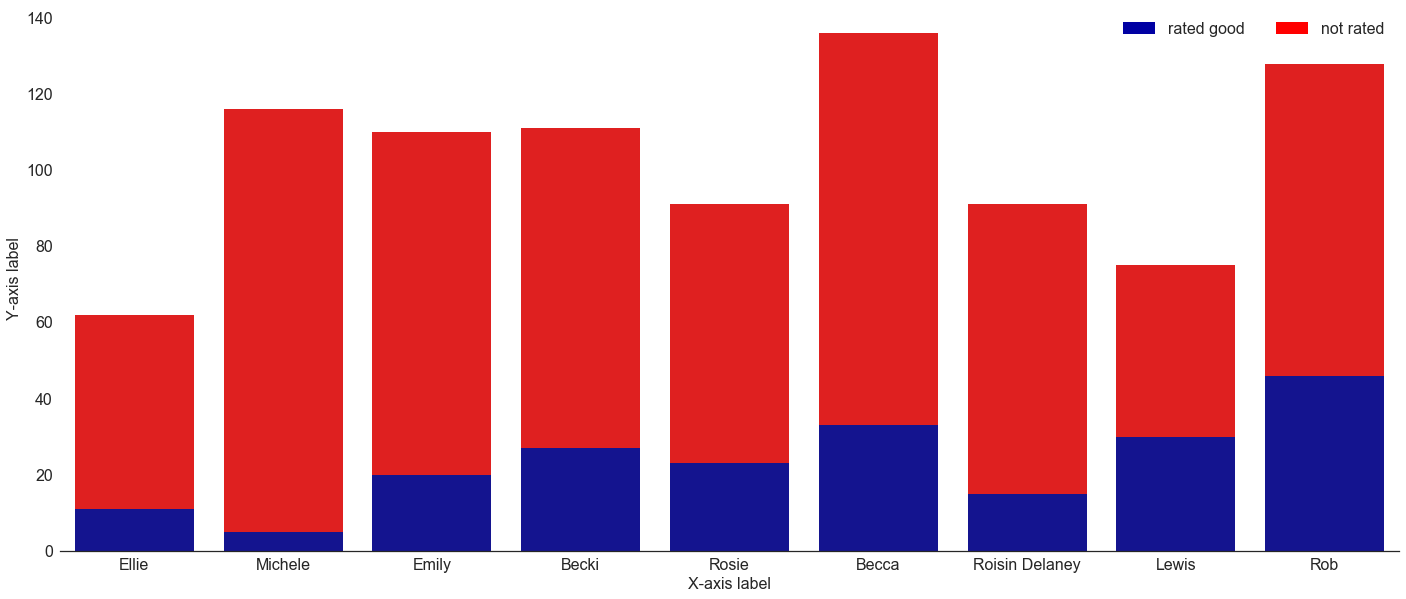

In [32]:

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Read in data & create total column
#stacked_bar_data = pd.read_csv("C:\stacked_bar.csv")
stacked_bar_data = df_combined2
#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.names, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.names, y = stacked_bar_data["rated good"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['rated good', 'not rated'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)


In [33]:
#my_list = df["cluster"].values
nr_list = df_combined2["not rated"].values
nr_list

array([ 51, 111,  90,  84,  68, 104,  76,  45,  82], dtype=int64)

### Stacked bar chart by percentage

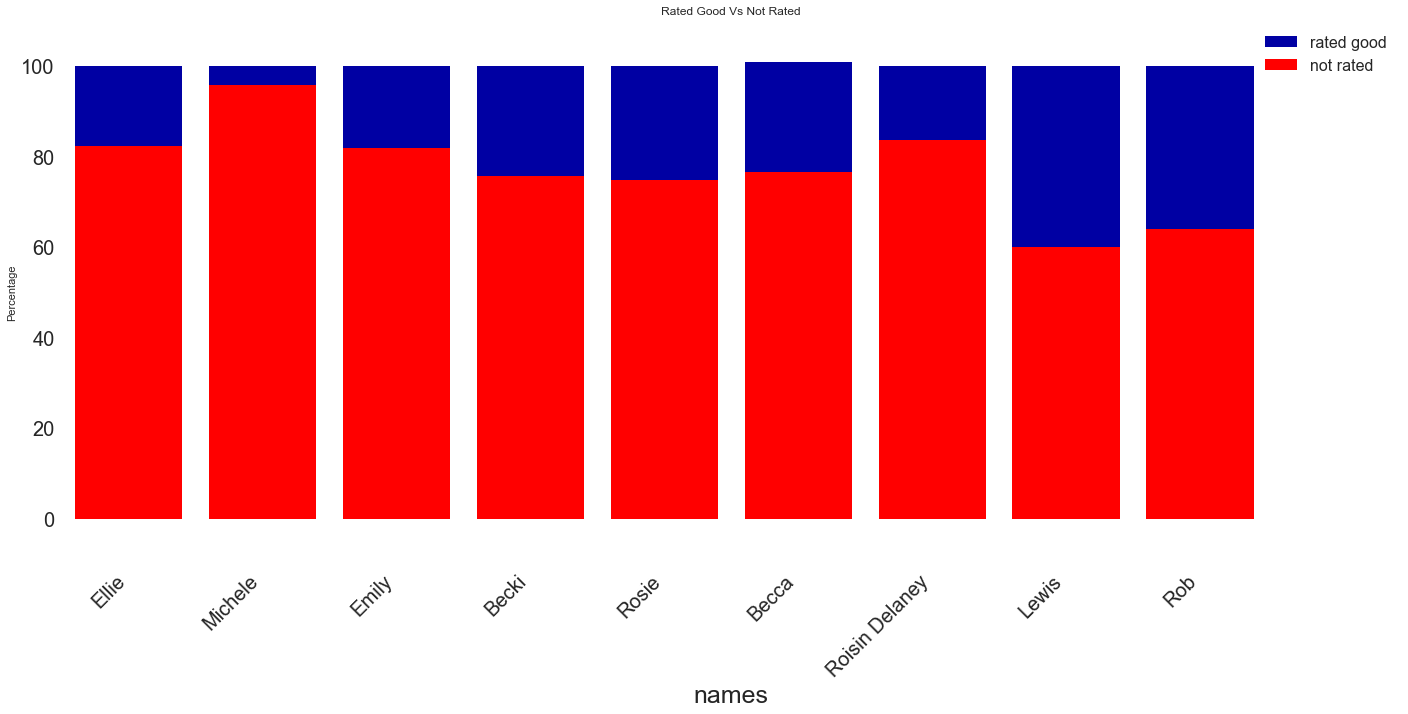

In [34]:
good_list = df_combined2["rated good"].values
nr_list = df_combined2["not rated"].values
ind = [x for x, _ in enumerate(df_combined2["names"])]
names = df_combined2["names"]

totals = df_combined2["total"].values
rated_good = [i / j * 100 for i,j in zip(df_combined2['rated good'], totals)]
not_rated = [i / j * 100 for i,j in zip(df_combined2['not rated'], totals)]

#Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df_combined2['rated good']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

plt.bar(ind, rated_good, width=0.8, label='rated good', color='#0000A3', bottom=not_rated)
plt.bar(ind, not_rated, width=0.8, label='not rated', color='red')
#plt.bar(ind, not_rated, width=0.8, label='bronzes', color='#CD853F')
#l = plt.legend([rated_good, not_rated], ['rated good', 'not rated'], loc=1, ncol = 2, prop={'size':16})
#l.draw_frame(False)

#plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize = 20)
plt.xticks(ind, names,fontsize = 20)
plt.ylabel("Percentage")
plt.xlabel("names",fontsize = 25)
plt.title("Rated Good Vs Not Rated")
# Let the borders of the graphic
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
#sns.set(rc={'figure.figsize':(24,10)})
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
sns.despine(left=True, bottom = True)
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

#Set fonts to consistent 16pt size
#for item in ([plt.ylabel, plt.xlabel]):
   # item.set_fontsize(20)
#plt.rcParams.update({'font.size': 22})
    
plt.legend(fontsize = 16)
plt.show()

For now that the end of the initial analysis.  The next version will be looking at things over various time stamps in Live Chat by Time